***Hector Chapa González***
<br>***Matrícula: 659639***

# **PROYECTO MODELO DE RED NEURONAL CONVOLUCIONAL PARA LA DETECCIÓN DE NEUMÁTICOS EN MALAS CONDICIONES**
<br>Este set de datos contiene 1,854 imágenes de neumáticos clasificados en 2 categorías:

*   Defectuosos
*   Buenas Condiciones

Cada imagen se encuentra disponible en formato digital y representa un neumático. Las imágenes se encuentran etiquetadas en base a sus condiciones, en este caso, si el neumático se encuentra en malas o en buenas condiciones.

<br>Este set de datos puede ser usado distintas aplicaciones de aprendizaje de máquina y visualización por computadora, como por ejemplo, clasificación de imágenes o detección de objetos.

<br>Investigadores, analistas y expertos en la industria del transporte, industria automotriz y control de calidad pueden utilizar este set de datos para entrenar y poner a prueba sus modelos para la precisa identificación de las condiciones de neumáticos a raíz de las imágenes digitales otorgadas. Dicho set de datos provee de un recurso invaluable para desarrollar y evaluar el rendimiento de algoritmos para la detección automática de neumáticos en malas condiciones.

<br>El set de datos, de igual forma, puede contribuir a la mejora de los procesos de control de calidad de la industria automotriz y transporte para reducir las probabilidades de accidentes a causa de neumáticos en malas condiciones o defectuosos. La disponibilidad de este set de datos puede facilitar el desarrollo de sistemas de inspección más precisos y eficientes para la producción de neumáticos.




In [ ]:
# Importamos las librerias correspondientes para realizar el modelo
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils, layers, Sequential
import keras
from keras import Model
from keras.layers import *
import cv2
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import  ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Montamos el drive de Google en Colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Asignamos las imagenes y etiquetas (0) de los neumáticos en buenas condiciones a las variables de entrada y salida
path_good = "/content/drive/MyDrive/Colab Notebooks/Deep Learning Course/Digital images of defective and good condition tyres/good"
img_size = 128
def read_images_good():

  good_img=[]
  good_label=[]
  for img in os.listdir(path_good):
    img_good = cv2.imread(os.path.join(path_good,img))
    img_resize = cv2.resize(img_good,(img_size,img_size))
    good_img.append([img_resize])
    label = 0
    good_label.append(label)
  return np.vstack(good_img), np.vstack(good_label)

x_good, y_good = read_images_good()

In [ ]:
x_good.shape

(828, 128, 128, 3)

In [ ]:
# Asignamos las imagenes y etiquetas (1) de los neumáticos en malas condiciones a las variables de entrada y salida
path_defective = "/content/drive/MyDrive/Colab Notebooks/Deep Learning Course/Digital images of defective and good condition tyres/defective"
img_size = 128
def read_images_defective():

  defective_img=[]
  defective_label=[]
  for img in os.listdir(path_defective):
    img_defective = cv2.imread(os.path.join(path_defective,img))
    img_resize = cv2.resize(img_defective,(img_size,img_size))
    defective_img.append([img_resize])
    label = 1
    defective_label.append(label)
  return np.vstack(defective_img), np.vstack(defective_label)

x_defective, y_defective = read_images_defective()

In [ ]:
x_defective.shape

(1028, 128, 128, 3)

In [ ]:
print("Numero de imagenes de neumáticos en buenas condiciones:", len(x_good))
print("Numero de imagenes de neumáticos en malas condiciones:",len(x_defective))
print("Total numero de imagenes de neumáticos:", len(x_good)+len(x_defective))

Numero de imagenes de neumáticos en buenas condiciones: 828
Numero de imagenes de neumáticos en malas condiciones: 1028
Total numero de imagenes de neumáticos: 1856


In [ ]:
print("Numero de etiquetas de neumáticos en buenas condiciones:", len(y_good))
print("Numero de etiquetas de neumáticos en malas condiciones:",len(y_defective))
print("Total numero de etiquetas de neumáticos:", len(y_good)+len(y_defective))

Numero de etiquetas de neumáticos en buenas condiciones: 828
Numero de etiquetas de neumáticos en malas condiciones: 1028
Total numero de etiquetas de neumáticos: 1856


In [ ]:
# Sumamos las variables de entrada x_good y x_defective y las variables de respuesta y_good, y_defective

x = np.vstack((x_good, x_defective))
y = np.vstack((y_good,y_defective))
print(x.shape)
print(y.shape)

(1856, 128, 128, 3)
(1856, 1)


In [ ]:
# Se asignan los datos de entrenamiento y de prueba a las nuevas variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}")

Tamaño del conjunto de entrenamiento: (1670, 128, 128, 3)
Tamaño del conjunto de prueba: (186, 128, 128, 3)


In [ ]:
# Variables de etiqueta de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (1670, 1)
Tamaño del conjunto de prueba: (186, 1)


Diseñaremos una Red Neuronal Convolucional empezando con la capa de entrada de InceptionV3 que dicha función arroja un modelo de clasificación de imágenes en Keras, opcionalmente cargados con pesos pre-entrenados en Image Net
<br>La función de Flatten devuelve una copia de la colección dada de cierta manera para colapsarla en una sola dimensión.
<br>
<br>Utilizaremos el tipo de capa y función Dense con 32 neuronas con función de activación "relu".
<br>
<br>Procedemos a realizar la técnica de Batch Normalization. Esta técnica realiza una normalización entre capas de una red neuronal en vez de aplicarlo sobre los mismos datos. Es realizada entre los lotes pequeños en lugar del set de datos completos. Ayuda a agilizar el entrenamiento y a usar tasas de aprendizaje más altas lo que hace el aprendizaje más fácil.
<br>
<br>Nuevamente, procedemos a utilizar el tipo de capa Dense pero ahora con 64 neuronas y nuevamente con función de activación "relu".
<br>
<br>Usamos nuevamente la técnica de Batch Normalization.
<br>
<br>Y finalizamos con una capa de salida con 1 neuronas con activación sigmoidal, esto debido a ser una red neuronal convolucional para la clasificación de imágenes con 2 etiquetas, modelo binario.

In [ ]:
# Se asigna la variable de inception a un modelo pre-entrenado llamado inception_v3
inception = keras.applications.inception_v3.InceptionV3  (input_shape = (img_size, img_size,3), include_top = False, weights = 'imagenet')
inception.trainable=False

In [ ]:
# Diseño de la Red Neuronal Convolucional
# Se designan las siguientes variables

x = Flatten()(inception.get_layer('mixed8').output)
x = Dense(32,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(1, activation='sigmoid')(x)

modelo = Model(inputs=inception.input, outputs = x)


In [ ]:
# Se especifica el optimizador a usar  y la métrica de desempeño a estimar en el proceso de entrenamiento
modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Imprime el modelo de la red neuronal
modelo.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 63, 63, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_192 (B  (None, 63, 63, 32)           96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 63, 63, 32)           0         ['batch_normalization_19

In [ ]:
# Se especifica la ruta donde el modelo de deep learning se almacenará
path = "/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Course/Proyecto_Clasif_Imagen"
checkpoint_every_epoch_project_path = path + 'checkpoints_every_epoch_Project/cp.ckpt'

# Se crea un callback que almacenará los pesos del modelo
cp_callback = ModelCheckpoint(filepath=checkpoint_every_epoch_project_path,
                              save_weights_only=True,
                              verbose=1)


In [ ]:
# Se especifica un criterio de paro
cp_early_stopping_callback = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True, verbose=1)

En este modelo se evaluara la métrica de Precisión como criterio de paro.
<br>El criterio min_delta corresponde al cambio mínimo en la cantidad monitoreada que calificará como mejora, por ejemplo, un cambio absoluto menor al min_delta establecido no contará como mejora.
<br>El criterio de restore_best_weights definirá si restaurar los pesos del modelo con el mejor valor de la cantidad monitoreada. Si se considera False, los pesos del modelo obtenidos al final del entrenamiento serán usados.
<br>El criterio start_from_epoch define el número de épocas a esperar antes de empezar a monitorear las mejoras. Esto permite que el modelo realice un periodo de calentamiento en el que se espera que no haya mejora y por ende el entrenamiento no se detendrá.

In [ ]:
# Se realiza la normalizacion de los datos de prueba y entrenamiento usando ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=.1/255)
test_generator = test_datagen.flow(x_test, y_test,batch_size=16,shuffle=False)

train_datagen = ImageDataGenerator(rescale = .1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=16, shuffle=True)

In [ ]:
# Entrenamiento de la Red Neuronal Profunda
callbacks = [cp_callback, cp_early_stopping_callback]
history = modelo.fit(train_generator, epochs=50, callbacks=callbacks, validation_data=test_generator)

Epoch 1/50
105/105 [==============================] - ETA: 0s - loss: 0.5740 - accuracy: 0.7186
Epoch 1: saving model to /content/gdrive/MyDrive/Colab Notebooks/Deep Learning Course/Proyecto_Clasif_Imagencheckpoints_every_epoch_Project/cp.ckpt
105/105 [==============================] - 77s 674ms/step - loss: 0.5740 - accuracy: 0.7186 - val_loss: 0.4315 - val_accuracy: 0.8226
Epoch 2/50
105/105 [==============================] - ETA: 0s - loss: 0.4641 - accuracy: 0.7647
Epoch 2: saving model to /content/gdrive/MyDrive/Colab Notebooks/Deep Learning Course/Proyecto_Clasif_Imagencheckpoints_every_epoch_Project/cp.ckpt
105/105 [==============================] - 64s 613ms/step - loss: 0.4641 - accuracy: 0.7647 - val_loss: 0.3703 - val_accuracy: 0.8656
Epoch 3/50
105/105 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.7802
Epoch 3: saving model to /content/gdrive/MyDrive/Colab Notebooks/Deep Learning Course/Proyecto_Clasif_Imagencheckpoints_every_epoch_Project/cp.ckpt


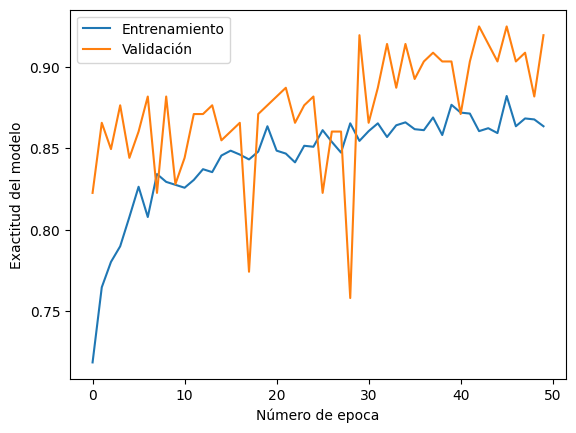

In [ ]:
# Curva de aprendizaje 'accuracy' (exactitud) para la Red Neuronal Convolucional
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Número de epoca')
plt.ylabel('Exactitud del modelo')
plt.legend(['Entrenamiento', 'Validación'])

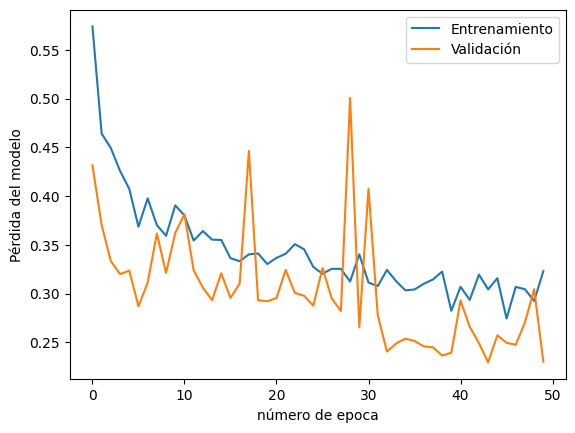

In [ ]:
# Curva de aprendizaje 'accuracy' (exactitud) para la Red Neuronal Convolucional
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('número de epoca')
plt.ylabel('Pérdida del modelo')
plt.legend(['Entrenamiento', 'Validación'])

In [ ]:
# Evaluaremos el modelo usando el set de datos de entrenamiento
train_loss, train_accuracy = modelo.evaluate(train_generator)
print(f"Train loss: {train_loss}")
print(f"Train accuracy: {train_accuracy}")

105/105 [==============================] - 59s 561ms/step - loss: 0.2600 - accuracy: 0.8856
Train loss: 0.2600499987602234
Train accuracy: 0.8856287598609924


In [ ]:
# Evaluaremos el modelo usando el set de datos de prueba
test_loss, test_accuracy = modelo.evaluate(test_generator)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

12/12 [==============================] - 5s 402ms/step - loss: 0.2301 - accuracy: 0.9194
Test loss: 0.2300725132226944
Test accuracy: 0.9193548560142517


In [ ]:
# Asignamos la variable test_generator a y_pred para usar la función predict
y_pred = modelo.predict(test_generator)
y_pred = y_pred.reshape(-1,)
y_pred = np.float16(y_pred>=0.5)

12/12 [==============================] - 9s 607ms/step


              precision    recall  f1-score   support

           0       0.94      0.88      0.91        84
           1       0.91      0.95      0.93       102

    accuracy                           0.92       186
   macro avg       0.92      0.92      0.92       186
weighted avg       0.92      0.92      0.92       186



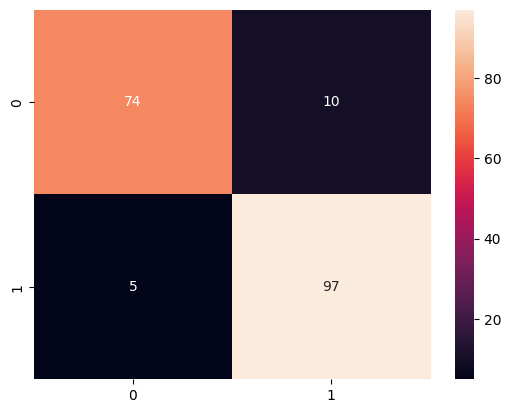

In [ ]:
# Con la variable y_pred creamos una matriz de confusión bajo la libreria de seaborn
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')
print (classification_report (y_test,y_pred))

In [ ]:
group_names = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percent = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percent)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap = 'Blues')